In [1]:
import tensorflow as tf

In [14]:
# mnist = tf.keras.datasets.mnist

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

cifar = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar.load_data()

X_train, X_test = X_train / 255, X_test / 255

X_train.shape, X_test.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [18]:
input_img = tf.keras.layers.Input(shape=(32, 32, 3))

#convulation block
net1 = tf.keras.layers.Conv2D(64, kernel_size=1, padding='same', activation='relu')(input_img)
net1 = tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu')(net1)

net2 = tf.keras.layers.Conv2D(64, kernel_size=1, padding='same', activation='relu')(input_img)
net2 = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(net2)

net3 = tf.keras.layers.Conv2D(64, kernel_size=1, padding='same', activation='relu')(input_img)
net3 = tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu')(net3)

net4 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=(1, 1), padding='same')(input_img)
net4 = tf.keras.layers.Conv2D(64, kernel_size=1, padding='same', activation='relu')(net4)

# inception
out = tf.keras.layers.concatenate([net1, net2, net3, net4], axis=3)

# Dense block
dens1 = tf.keras.layers.Flatten()(out)
dens2 = tf.keras.layers.Dense(100, activation='relu')(dens1)
dens3 = tf.keras.layers.Dense(60, activation='relu')(dens2)
dens4 = tf.keras.layers.Dense(10, activation='softmax')(dens3)

model = tf.keras.models.Model(inputs=input_img, outputs=dens4)

# tf.keras.utils.plot_model(model=model, show_shapes=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
   7/1563 [..............................] - ETA: 27:20 - loss: 6.8101 - accuracy: 0.1384

KeyboardInterrupt: ignored

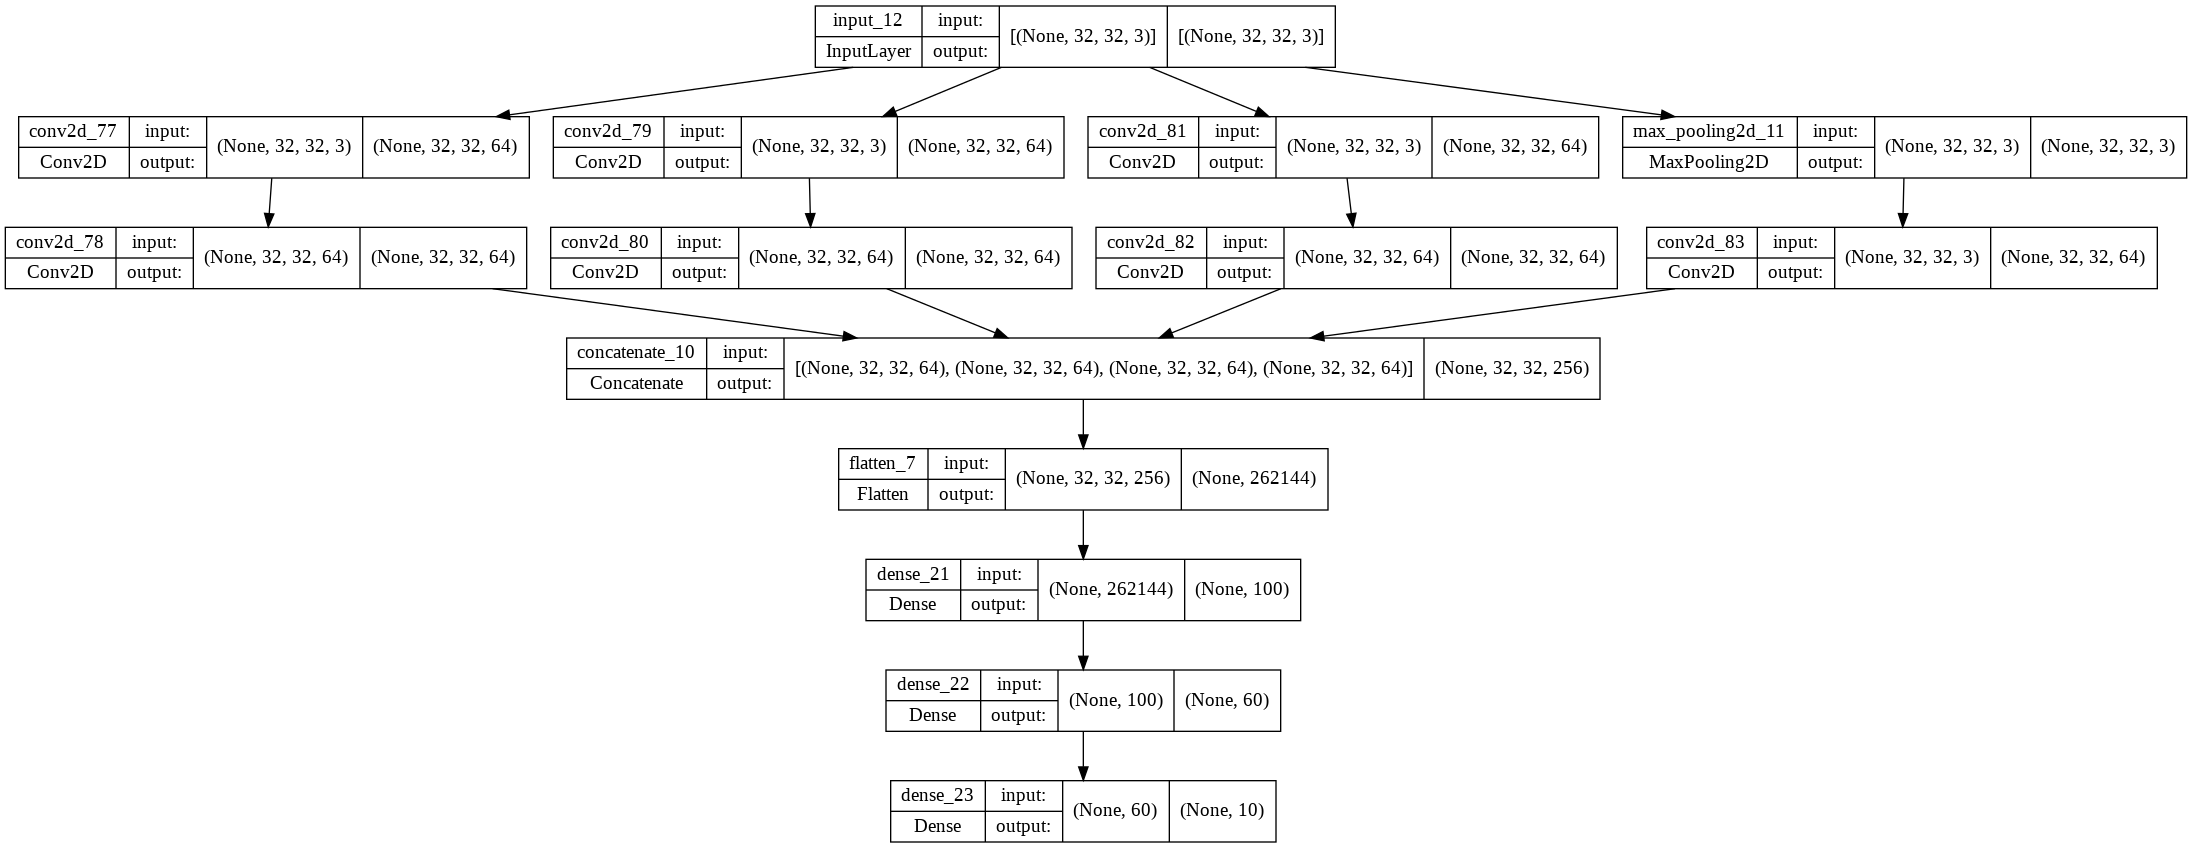

In [19]:
tf.keras.utils.plot_model(model=model, show_shapes=True)